한국어 Word2Vec 만들기(네이버 뉴스)

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import re
from eunjeon import Mecab

In [80]:
정상기업 = pd.read_csv('./정상_새로합친거.csv',index_col=0)
# 정상기업 = pd.read_csv('./data/정상기업뉴스.csv')


In [81]:
data=정상기업
# data=pd.concat([상폐기업, 정상기업], axis = 0)
# data=pd.concat([상폐기업, 정상기업], axis = 0)

In [82]:
data[:5]

,기업,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문
0,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...,NaN
1,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...,NaN
2,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...,NaN
3,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN
4,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN


기사본문 전처리

In [6]:
# 제거할기사제목 = ['증시 일정', '증시일정', '장마감후', '장 마감 후', '장마감공시', '증시 캘린더', '재송', '투자정보', \
#     '코스닥 기업공시', '장중 주요', '코스닥 3분기 결산', '주요 뉴스 및 공시', '기업공시',' 기업 공시', '장 종료 후', \
#         '특징주A/S', '주요 정보', '오전 공시', '투자정보', '기업 공시', '오늘의 메모', '재테크 캘린더', '추천주 정리', '희망복원 주식클리닉', \
#         '\d{1,2}월 \d{1,2}일', '오늘의 주요 공시', '코스닥 공시', '코스닥 메모', '대박 공모주', '<표>', '오늘의 리포트', \
#         '공략주', '주식상담소', '주식왕 따라잡기', '주식컨설팅', '\d{4} 증시', '춤추는 테마주', '개장시황', \
#         '폭등신호 터진', '대폭등', '매드머니', '주담과 Q&A', '굿바이 \d{4}', '지금 당장 사라', '폭등주', \
#         '\d{4}%', '김정일 사망', '종목대탐험', '종목신호등', 'VIP CLUB', '수급유망주', '기상도', '중소형주', \
#         '국민주식고충처리반', '유망주', '머니Q', '시초가잡아라', '기관 Q&A', '부동산에 투자하려면', '베스트애널리스트', \
#         '코스닥협회장 취임', '코스닥협회', '부동산에 투자하는 방법', '국가품질 경영대회', '증시일정', '머니Q', '추천종목', '티타임 공략주', \
#         '수급유망주', '종목배틀', '\d{4} 증시 결산', '기업설명회', '종목신호등', 'VIP CLUB 추천주', '내일장 공략주 10선', '주간컨센서스동향', \
#         '주담과 Q&A', '조회공시', '주가급등 사유', '관련株들', '게임株', '이시각 Up&Down', '장내 매도', '[인사]', '증시기상도', \
#         '[재송]', '마감시황', '주식부자 속출', '교육주', '티타임 공략주', '\d{1,2}일 증권사 추천종목', '기업IR소식', '[승부주]']
# # 제거제목리스트=[]
# 제거제목리스트 = '|'.join(제거할기사제목)
# data_unique = data.drop_duplicates(['뉴스기사본문'])
# data_result = data_unique[~data_unique['기사제목'].str.contains(제거제목리스트, na=False, case=False)]
# #data_result.to_csv('dd.csv')
# pattern1 = r'\([^)]*\)'
# #pattern2 = r'\[[^)]*\]'
# pattern2 = r"\[([^]]+)\]"



# # data_unique['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_unique['뉴스기사본문']]
# # data_unique['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_unique['뉴스기사본문전처리']]
# # data_unique['뉴스기사본문전처리'] = [re.sub('[^/^$|\s+/가-힣\.]', '', s) for s in data_unique['뉴스기사본문전처리']]
# # data_unique['뉴스기사본문전처리'] = [re.sub('[[ \s]{2,}\.{2,}]', '', s) for s in data_unique['뉴스기사본문전처리']]
# # data_unique['뉴스기사본문전처리'] = [re.sub('\n', '', s) for s in data_unique['뉴스기사본문전처리']]
# # data_unique
# # data_unique.to_csv('dd.csv', index=None)





# data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
# data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
# data_result['뉴스기사본문전처리'] = [re.sub('[^/^$|\s+/가-힣\.]', '', s) for s in data_result['뉴스기사본문전처리']]
# data_result['뉴스기사본문전처리'] = [re.sub('[[ \s]{2,}\.{2,}]', '', s) for s in data_result['뉴스기사본문전처리']]
# data_result['뉴스기사본문전처리'] = [re.sub('\n', '', s) for s in data_result['뉴스기사본문전처리']]
# data_result
# data_result.to_csv('dd_상폐.csv', index=None)

C:\Users\jangd\AppData\Local\Temp\ipykernel_19360\4129387148.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_19360\4129387148.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_19360\4129387148.py:38: SettingWithCopyWarning: 
A value is trying to

전처리된 기사 본문 불러와서 word2vec시작

In [7]:
train_data = pd.read_csv('./dd_상폐.csv')
train_data["기사발행일"]

0        2010.08.16. 오후 5:21
1        2010.07.15. 오후 6:46
2        2010.06.03. 오후 5:06
3       2010.05.24. 오전 10:41
4        2010.05.18. 오후 1:23
                ...         
2697    2020.01.09. 오전 10:07
2698     2020.03.04. 오후 5:45
2699     2020.01.10. 오후 6:42
2700     2019.12.27. 오후 6:13
2701     2019.12.20. 오후 6:05
Name: 기사발행일, Length: 2702, dtype: object

In [83]:
time=data["기사발행일"].str.split('.').tolist()
time_df=pd.DataFrame(time,columns=['년','월','일','시간'])
time_df.drop("시간",axis=1,inplace=True)

In [84]:
time_df

,년,월,일
0,2011,08,16
1,2011,06,08
2,2011,06,07
3,2011,03,12
4,2011,03,11
...,...,...,...
6741,2020,09,22
6742,2020,09,21
6743,2020,12,04
6744,2020,12,30


In [13]:
train_data = train_data.dropna(how = 'any')  # Null 값이 존재하는 행 제거
print(train_data.isnull().values.any())      # Null 값이 존재하는지 확인

False


In [14]:
print(len(train_data))   # 기사본문 개수 출력

2702


In [15]:
# 불용어 정의
# stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [71]:
# 형태소 분석기 mecab를 사용한 토큰화 작업 (다소 시간 소요)

mecab = Mecab()
data['뉴스기사본문전처리'] = data['뉴스기사본문전처리'].apply(lambda x: mecab.nouns(x))
# 한 글자 단어 제거
data['뉴스기사본문전처리'] = data['뉴스기사본문전처리'].apply(lambda x: [word for word in x if len(word) > 1])


# tokenized_data = []
# output=[]
# for sentence in data['뉴스기사본문전처리']:
#     temp_X = mecab.nouns(sentence)  # 토큰화
#      # 불용어 제거

#     tokenized_data.append(temp_X)


In [72]:
data.reset_index(inplace=True)

In [73]:
분류단어 = ['폐지', '격성', '퇴출', '실질', '심사', '속개', '이의', '심의', '거절']
분류단어 = '|'.join(분류단어)
분류단어

'폐지|격성|퇴출|실질|심사|속개|이의|심의|거절'

In [74]:
data['뉴스기사_레이블']=data['기사제목']

In [75]:
라벨 = data['뉴스기사본문전처리'].apply(lambda x: [word for word in x if word in 분류단어])
라벨 = 라벨.apply(lambda x: [word for word in x if word not in '상장'])
라벨 = 라벨.apply(lambda x: 1 if (len(x)>=1) else 0)

라벨

0       0
1       1
2       0
3       1
4       1
       ..
6741    0
6742    0
6743    0
6744    0
6745    0
Name: 뉴스기사본문전처리, Length: 6746, dtype: int64

In [76]:
# plor=
# a="|".join(plor)
# keywords= ['폐지', '격성', '퇴출', '실질', '심사', '속개', '이의', '심의', '거절']
for i in range(len(data)):
    data['뉴스기사_레이블'][i]=라벨[i]

C:\Users\jangd\AppData\Local\Temp\ipykernel_20112\3489174010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['뉴스기사_레이블'][i]=라벨[i]


In [77]:
data.drop(["index","뉴스기사본문"],inplace=True,axis=1)

In [78]:
data

,기업,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사_레이블
0,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'","[코스닥, 시장, 품주, 강세, 구글, 모토, 로라, 인수, 소식, 모토, 로라, ...",0
1,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,"[코스피, 시장, 법인, 청산, 푸드, 서비스, 계열사, 제외, 공시, 푸드, 서비...",1
2,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외","[법인, 청산, 푸드, 서비스, 계열사, 제외, 공시, 푸드, 서비스, 자본금, 억...",0
3,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원","[현대, 카드, 현대캐피탈, 성공, 열정, 도전, 개인, 사업자, 이야기, 리얼리티...",1
4,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""","[현대, 카드, 현대캐피탈, 성공, 열정, 도전, 개인, 사업자, 이야기, 리얼리티...",1
...,...,...,...,...,...
6741,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑","[에이치엘비, 유럽, 종양, 학회, 리보, 세라, 가치, 입증, 사진, 에이치엘비,...",0
6742,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표","[에이치엘비, 김제, 기자, 에이치엘비, 유럽, 종양, 학회, 리보, 세라, 관련,...",0
6743,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""","[수소, 연료전지, 선박, 개발, 협력, 수소, 유람선, 상용, 목표, 설계, 모듈...",0
6744,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동","[코스닥, 지수, 지난해, 대비, 상승, 개인, 비중, 확대, 거래량, 급등, 한국...",0


In [46]:
data_df=data.groupby(["기업"]).sum()
data_df
# data_df["부도기사 비율"]=data_df["뉴스기사 레이블"]
# len(data_df["뉴스기사 레이블"])


,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사_레이블
기업,,,,
KCW,2015.06.02. 오후 2:582015.05.28. 오후 8:442015.05....,"보쉬-KCW, 와이퍼시스템 합작회사 설립 '대구시와 MOU'KCW ""와이퍼 사업부문...","[본문, 이미지, 영역, 왼쪽, 보쉬, 조인트, 벤처, 와이퍼, 시스템, 대표, 이...",15
글로웍스,2011.03.22. 오후 6:472011.02.28. 오전 9:172011.02....,"글로웍스, 불성실공시법인 지정 주권매매거래정지[특징주]글로웍스, 90% 감자 주총 ...","[웍스, 성실, 공시, 법인, 지정, 주권, 매매, 거래, 정지, 공시, 기법, 특...",11
금강제강,2012.03.28. 오후 3:282012.04.24. 오전 3:382012.04....,"에이치디시에스, 금강제강으로 사명 변경[코스닥 메모] (24일) 무상권리락=인화정공...","[디시에스, 기업, 이미지, 제고, 금강, 제강, 사명, 변경, 공시, 한경, 닷컴...",4
나노트로닉스,2014.01.10. 오후 1:442014.01.10. 오후 4:162013.12....,"[특징주]나노트로닉스, 현 대표 구속 소식에 '하한가'[오늘의 주요 공시]나노트로닉...","[노트, 닉스, 주가, 대표, 이사, 검찰, 구속, 소식, 하한가, 기록, 오후, ...",0
나이스메탈,2011.01.31. 오전 7:412011.01.26. 오후 4:002011.01....,"나이스메탈, 사내이사의 이사회 결의금지 소송나이스메탈, 부당이득반환소송 항소심 승소...","[나이스, 메탈, 주식회사, 사내, 이사, 김성재, 감사, 김선희, 사회, 개최, ...",9
...,...,...,...,...
한와이어리스,2011.01.21. 오전 11:042010.12.16. 오전 9:412010.12...,"한와이어리스, 신주인수권 행사가액 조정[특징주]급등랠리 멈춘 한와이어리스, 下[특징...","[와이어리스, 하락, 신주인수권, 행사, 기존, 조정, 공시, 뉴스, 고급, 증권,...",14
해피드림,2015.01.22. 오전 9:392014.12.29. 오후 5:112014.12....,"[특징주]해피드림, 급등..흑전으로 관리종목 탈피 기대해피드림, 신주인수권 70만주...","[해피, 드림, 흑자, 전환, 관리, 종목, 탈피, 기대감, 급등세, 오전, 시분,...",14
핸디소프트,2010.11.19. 오후 5:232010.11.08. 오전 8:082010.11....,"핸디소프트, 이사 직무정지 가처분 피소1세대 벤처 핸디소프트, 대주주 횡령에 매각 ...","[핸디, 소프트, 김상효, 회사, 대표, 상대, 제기, 이사, 감사, 해임, 청구,...",20


In [47]:
count_df=data.groupby(["기업"]).count()
# count_df.columns=['기사발행일', '기사제목', '뉴스기사본문', '뉴스기사본문전처리', '뉴스기사 수']
count_df

,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사_레이블
기업,,,,
KCW,35,35,35,35
글로웍스,73,73,73,73
금강제강,5,5,5,5
나노트로닉스,26,26,26,26
나이스메탈,77,77,77,77
...,...,...,...,...
한와이어리스,93,93,93,93
해피드림,64,64,64,64
핸디소프트,46,46,46,46


In [50]:
count_df["부도기사비율"]=data["기업"]

In [51]:
count_df

,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사_레이블,부도기사비율
기업,,,,,
KCW,35,35,35,35,NaN
글로웍스,73,73,73,73,NaN
금강제강,5,5,5,5,NaN
나노트로닉스,26,26,26,26,NaN
나이스메탈,77,77,77,77,NaN
...,...,...,...,...,...
한와이어리스,93,93,93,93,NaN
해피드림,64,64,64,64,NaN
핸디소프트,46,46,46,46,NaN


In [55]:
count_df["부도기사비율"]=data_df["뉴스기사_레이블"]/count_df["뉴스기사_레이블"]
a=pd.DataFrame(count_df["부도기사비율"])
a.to_csv("새로운부도기사비율.csv",encoding="utf-8-sig")

In [19]:
len(remove_one_word)
list_text_1=sum(remove_one_word, [])

In [20]:
word=pd.DataFrame(list_text_1)
word.to_csv("word2vec_word.csv",encoding="utf-8-sig")

In [21]:
from collections import Counter

In [22]:
횟수=Counter(list_text_1)
횟수['폐지']
# for i in range(len(list_text_1)):
    
# print(Counter(list_text_1))

1309

기사의 길이 및 분포 확인

기사의 최대 길이 : 1832
기사의 평균 길이 : 156.29496669133974


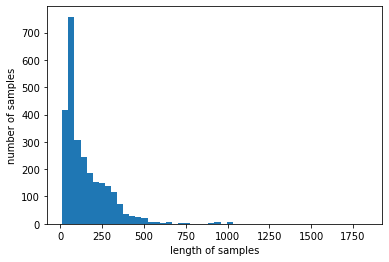

In [23]:
# 기사 길이 분포 확인

print('기사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show();

word2vec훈련

In [24]:
# Word2Vec 훈련시키기

from gensim.models import Word2Vec # 
model = Word2Vec(sentences = remove_one_word, window = 5, min_count = 5, workers = 4, sg = 1, )

In [25]:
# 완성된 임베딩 매트릭스의 크기 확인

model.wv.vectors.shape

(5907, 100)

유사도확인

In [26]:
print(model.wv.most_similar(["폐지"]))

[('퇴출', 0.8211759924888611), ('심사', 0.7924410104751587), ('격성', 0.7903725504875183), ('기로', 0.7850276231765747), ('요건', 0.7842447757720947), ('모면', 0.7801958322525024), ('벼랑', 0.7733277678489685), ('청구서', 0.7729319334030151), ('확인서', 0.7682451605796814), ('이의', 0.7620949149131775)]


In [27]:
print(model.wv.most_similar(["부도"],topn=20))
dataframe_1=model.wv.most_similar(["부도"],topn=20)
dataframe=pd.DataFrame(dataframe_1)
dataframe.columns=['단어','유사도']
dataframe

[('미결재', 0.8926321864128113), ('제때', 0.8886010646820068), ('도출', 0.8559080362319946), ('소명', 0.8542006015777588), ('수시', 0.852849006652832), ('서류', 0.8481168150901794), ('의거', 0.8439792990684509), ('하도급', 0.8413634300231934), ('결론', 0.840756893157959), ('경영난', 0.8396047949790955), ('외상', 0.8349282741546631), ('처지', 0.8344768285751343), ('난항', 0.8326036334037781), ('이의', 0.8300736546516418), ('단의', 0.8286551237106323), ('종결', 0.8284042477607727), ('중재', 0.8279462456703186), ('납부', 0.8279149532318115), ('진통', 0.8268039226531982), ('기사회생', 0.8264684081077576)]


,단어,유사도
0,미결재,0.892632
1,제때,0.888601
2,도출,0.855908
3,소명,0.854201
4,수시,0.852849
5,서류,0.848117
6,의거,0.843979
7,하도급,0.841363
8,결론,0.840757
9,경영난,0.839605


In [28]:
print(model.wv.most_similar(["폐지"],topn=10))
dataframe_1=model.wv.most_similar(["폐지"],topn=10)
dataframe=pd.DataFrame(dataframe_1)
dataframe.columns=['단어','유사도']
dataframe

[('퇴출', 0.8211759924888611), ('심사', 0.7924410104751587), ('격성', 0.7903725504875183), ('기로', 0.7850276231765747), ('요건', 0.7842447757720947), ('모면', 0.7801958322525024), ('벼랑', 0.7733277678489685), ('청구서', 0.7729319334030151), ('확인서', 0.7682451605796814), ('이의', 0.7620949149131775)]


,단어,유사도
0,퇴출,0.821176
1,심사,0.792441
2,격성,0.790373
3,기로,0.785028
4,요건,0.784245
5,모면,0.780196
6,벼랑,0.773328
7,청구서,0.772932
8,확인서,0.768245
9,이의,0.762095


In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [31]:
train_data['뉴스기사 레이블']=train_data['기사제목']

뉴스기사 레이블 시키기

In [32]:
# plor=
# a="|".join(plor)
keywords= ['폐지', '격성', '퇴출', '실질', '심사', '속개', '이의', '심의', '거절']
for i in range(len(train_data)):
    if any(keyword in str(train_data["뉴스기사본문전처리"][i]) for keyword in keywords)==True:
        train_data['뉴스기사 레이블'][i]=1
    else:
        train_data['뉴스기사 레이블'][i]=0

뉴스기사 레이블 1인것 합친 수

In [33]:
train_data['뉴스기사 레이블'].sum()

665

In [34]:
train_data

,기업,기사발행일,기사제목,뉴스기사본문,뉴스기사본문전처리,뉴스기사 레이블
0,네이쳐글로벌,2010.08.16. 오후 5:21,"네이쳐글로벌, 반기검토의견 ""의견거절'…거래정지","네이쳐글로벌는 16일 반기 검토 의견이 ""의견거절""로 관리종목 지정 사유가 발생했다...",네이쳐글로벌는 일 반기 검토 의견이 의견거절로 관리종목 지정 사유가 발생했다고 공시...,0
1,네이쳐글로벌,2010.07.15. 오후 6:46,네이쳐글로벌 신용등급 `CC`로 두단계 하향,[이데일리 이태호 기자] 네이쳐글로벌(088020)의 신용등급을 기존 `B-(부정적...,네이쳐글로벌의 신용등급을 기존 에서 으로 하향 조정한다고 한신정평가가 일 밝혔다....,0
2,네이쳐글로벌,2010.06.03. 오후 5:06,"네이쳐글로벌, 20대 1 감자 실시",[이데일리 안재만 기자] 네이쳐글로벌(088020)은 20대 1 감자를 결의했다고 ...,네이쳐글로벌은 대 감자를 결의했다고 일 공시했다.감자 주주총회일은 다음달 일 감...,0
3,네이쳐글로벌,2010.05.24. 오전 10:41,<생생코스닥> 네이쳐글로벌 3거래일 연속 하한가,네이쳐글로벌(088020)이 연 3거래일 연속 하한가를 기록하며 주가가 200원 선...,네이쳐글로벌이 연 거래일 연속 하한가를 기록하며 주가가 원 선 마저 위협 받고 있다...,0
4,네이쳐글로벌,2010.05.18. 오후 1:23,"네이쳐글로벌 ""생수시장 진출 하반기 150억 계획""",[머니투데이 김경원 기자]네이쳐글로벌(대표 박지우)은 대규모 생수회사를 자산양수도 ...,네이쳐글로벌은 대규모 생수회사를 자산양수도 방식으로 인수 추진 중이라고 일 밝혔다....,0
...,...,...,...,...,...,...
2697,코썬바이오,2020.01.09. 오전 10:07,"코썬바이오, 상한가 진입... 이평선 역배열 상황에서 반등 시도",[한국경제TV 라이온봇 기자]\n코썬바이오\n\n\n9일 오전 코썬바이오(20499...,코썬바이오일 오전 코썬바이오가 상한가를 기록했다. 코썬바이오는 균형생식환 황찬고 등...,0
2698,코썬바이오,2020.03.04. 오후 5:45,"코썬바이오, 거래소에 개선계획서 제출",[이데일리 유현욱 기자] 한국거래소 코스닥시장본부는 4일 상장적격성 실질심사 대상으...,한국거래소 코스닥시장본부는 일 상장적격성 실질심사 대상으로 결정된 코썬바이오가 개...,1
2699,코썬바이오,2020.01.10. 오후 6:42,코썬바이오 거래정지,한국거래소는 코스닥 상장기업인 코썬바이오에 대해 1월 13일부터 상장적격성 실질심사...,한국거래소는 코스닥 상장기업인 코썬바이오에 대해 월 일부터 상장적격성 실질심사 대상...,0
2700,코썬바이오,2019.12.27. 오후 6:13,"코썬바이오, 10억원 규모 유상증자 결정",[이데일리 김윤지 기자] 코썬바이오(204990)는 운영자금 10억원을 조달하기 위...,코썬바이오는 운영자금 억원을 조달하기 위해 제자배정증자 방식의 유상증자를 결정했다...,0


In [39]:
data_df=train_data.groupby(["기업"]).sum()
data_df
# data_df["부도기사 비율"]=data_df["뉴스기사 레이블"]
len(data_df["뉴스기사 레이블"])

127

In [36]:

count_df=train_data.groupby(["기업"]).count()
count_df.columns=['기사발행일', '기사제목', '뉴스기사본문', '뉴스기사본문전처리', '뉴스기사 수']
count_df

,기사발행일,기사제목,뉴스기사본문,뉴스기사본문전처리,뉴스기사 수
기업,,,,,
KCW,14,14,14,14,14
글로웍스,24,24,24,24,24
나노트로닉스,10,10,10,10,10
나이스메탈,27,27,27,27,27
네스테크,29,29,29,29,29
...,...,...,...,...,...
한와이어리스,34,34,34,34,34
해피드림,28,28,28,28,28
핸디소프트,12,12,12,12,12


In [37]:
data_df["부도기사 비율"]=round(data_df["뉴스기사 레이블"]/count_df["뉴스기사 수"]*100,2)
final_df=pd.DataFrame(data_df["부도기사 비율"])
final_df.to_csv("상폐기업_부도기사 비율.csv",encoding="utf-8-sig")

들어간 기사 수 개수 세기

In [38]:
# plor=["폐지","퇴출","기로","벼랑"]
# a="|".join(plor)
# df=train_data[train_data['뉴스기사본문전처리'].str.contains(a)]
# df

s